In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#dictonary
alien = {
    'alien1': {'mood': 'happy', 'sentence': 'aack, aack, aack!'},
    'alien2': {'mood': 'sad', 'sentence': 'beep beep!'},
    'alien3': {'mood': 'happy', 'sentence': 'aack beep aack!'},
    'alien4': {'mood': 'sad', 'sentence': 'aack beep beep beep!'}
}

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(alien).T

df

,mood,sentence
alien1,happy,"aack, aack, aack!"
alien2,sad,beep beep!
alien3,happy,aack beep aack!
alien4,sad,aack beep beep beep!


In [3]:
df['aack'] = df['sentence'].apply(lambda x: x.count('aack'))
df['beep'] = df['sentence'].apply(lambda x: x.count('beep'))

df

,mood,sentence,aack,beep
alien1,happy,"aack, aack, aack!",3,0
alien2,sad,beep beep!,0,2
alien3,happy,aack beep aack!,2,1
alien4,sad,aack beep beep beep!,1,3


In [4]:
#creo mi score, si dice aack sumo 1 y si dice beep resto uno por oración.
#elimino caracteres especiales y convierto a minúsculas

def algoritmo_clasificacion(sentence):
    sentence = sentence.replace('!', '').replace(',', '').lower() #elimino caracteres especiales y convierto a minúsculas
    score = 0
    for word in sentence.split(): #recorro la oración
        if word == 'aack':
            score += 1
        elif word == 'beep':
            score -= 1
    return score


In [5]:
#creo mi columna score
df['score'] = df['sentence'].apply(algoritmo_clasificacion)

In [6]:
df

,mood,sentence,aack,beep,score
alien1,happy,"aack, aack, aack!",3,0,3
alien2,sad,beep beep!,0,2,-2
alien3,happy,aack beep aack!,2,1,1
alien4,sad,aack beep beep beep!,1,3,-2


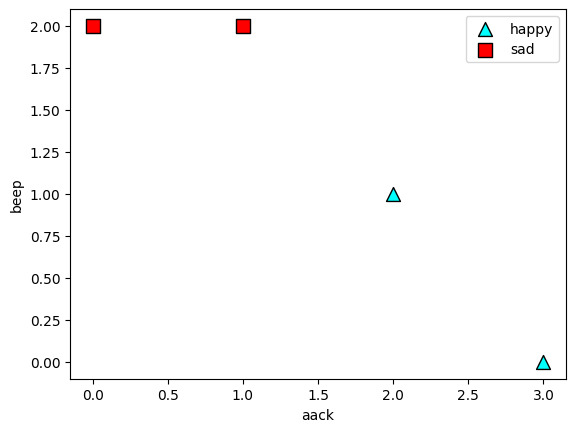

In [10]:
#plot
from perceptron_algo import *
plot_points(df[['aack', 'beep']], df['mood'].apply(lambda x: 1 if x == 'happy' else 0))

In [14]:
df['mood'] = df['mood'].apply(lambda x: 1 if x == 'happy' else 0)
df

,mood,sentence,aack,beep,score
alien1,0,"aack, aack, aack!",3,0,3
alien2,0,beep beep!,0,2,-2
alien3,0,aack beep aack!,2,1,1
alien4,0,aack beep beep!,1,2,-1


## Ejemplo 2

In [16]:
alien = {
    "alien1": {"mood": "Sad", "sentence": "Crack!"},
    "alien2": {"mood": "Sad", "sentence": "Doink doink!"},
    "alien3": {"mood": "Sad", "sentence": "Crack doink!"},
    "alien4": {"mood": "Sad", "sentence": "Crack doink crack!"},
    "alien5": {"mood": "Happy", "sentence": "Doink crack doink doink!"},
    "alien6": {"mood": "Happy", "sentence": "Crack doink doink crack!"},
    "alien7": {"mood": "Happy", "sentence": "Doink doink crack crack crack!"},
    "alien8": {"mood": "Happy", "sentence": "Crack doink doink crack doink!"}
}

#create a dataframe
df2 = pd.DataFrame(alien).T
df2

,mood,sentence
alien1,Sad,Crack!
alien2,Sad,Doink doink!
alien3,Sad,Crack doink!
alien4,Sad,Crack doink crack!
alien5,Happy,Doink crack doink doink!
alien6,Happy,Crack doink doink crack!
alien7,Happy,Doink doink crack crack crack!
alien8,Happy,Crack doink doink crack doink!


In [18]:
df2['crack'] = df2['sentence'].apply(lambda x: x.replace('!', '').replace(',', '').lower().count('crack'))
df2['doink'] = df2['sentence'].apply(lambda x: x.replace('!', '').replace(',', '').lower().count('doink'))

In [19]:
df2["score_planeta_nuevo"] = df2["doink"] + df2["crack"]
df2

,mood,sentence,crack,doink,score_planeta_nuevo
alien1,Sad,Crack!,1,0,1
alien2,Sad,Doink doink!,0,2,2
alien3,Sad,Crack doink!,1,1,2
alien4,Sad,Crack doink crack!,2,1,3
alien5,Happy,Doink crack doink doink!,1,3,4
alien6,Happy,Crack doink doink crack!,2,2,4
alien7,Happy,Doink doink crack crack crack!,3,2,5
alien8,Happy,Crack doink doink crack doink!,2,3,5
